# Warm Up Python

Para un proyecto de ML es importante realizar una análisis previo de los datos con el fin de alistarlos para la fase de modelamiento.

## Objetivo:
El objetivo de este taller es aprender códigos básicos que te permitiran abordar en tus proyectos personales la fase de preprocesamiento y exploración de los datos.

## Manipulación de Datos con Pandas

Pandas es un paquete creado sobre Numpy, los ``DataFrame`` son conjunto de datos multidimensionales con etiquetas de fila y columna.  Ademas de ofrecer una interfaz de almacenamiento para datos etiquetados, Pandas implementa potentes operaciones de datos.

### Instalando Pandas

La instalación de Pandas requiere en el sistema el paquete Numpy.

Para instalarlo se usa el comando:
```
# Instalacion con pip
pip install pandas

# Instalacion con conda
conda install pandas
```

In [2]:
# Si no se tiene pandas instalado
!pip install pandas

Luego de instalado, se importa y se puede chequear la version de la siguiente manera:

In [3]:
# Importando librerias
import pandas as pd
import numpy as np

In [4]:
# Version de Pandas
pd.__version__

'1.5.3'

### Objetos de Pandas

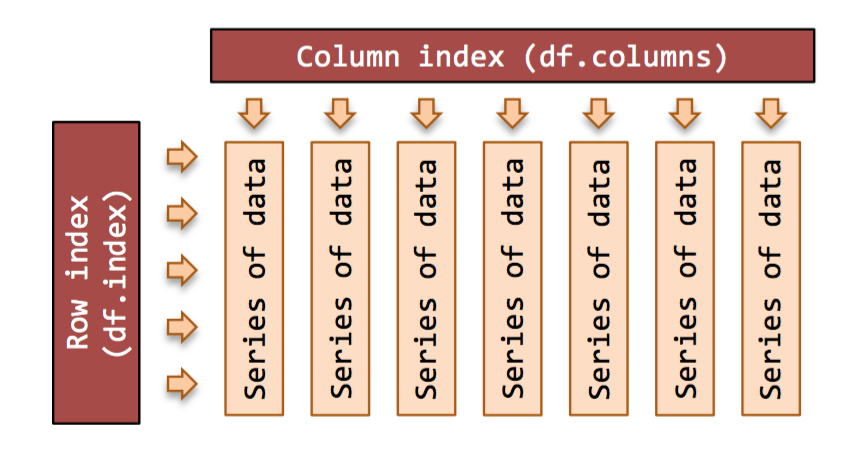

In [5]:
from IPython.display import Image
Image(filename='base_01_pandas_5_0.png', width=500)
# Resource: https://bookdata.readthedocs.io/en/latest/base/01_pandas.html

### Titanic Dataset

Trabajemos con el famoso conjunto de datos del [titanic](https://www.kaggle.com/c/titanic/data).

- PassengerId -- A numerical id assigned to each passenger.
- Survived -- Whether the passenger survived (1), or didn't (0).
- Pclass -- The class the passenger was in.
- Name -- the name of the passenger.
- Sex -- The gender of the passenger -- male or female.
- Age -- The age of the passenger.  Fractional.
- SibSp -- The number of siblings and spouses the passenger had on board.
- Parch -- The number of parents and children the passenger had on board.
- Ticket -- The ticket number of the passenger.
- Fare -- How much the passenger paid for the ticket.
- Cabin -- Which cabin the passenger was in.
- Embarked -- Where the passenger boarded the Titanic.

In [6]:
# Cargamos el archivo
titanic = pd.read_csv("Datasets/train.csv")

In [7]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
type(titanic.PassengerId)

pandas.core.series.Series

In [10]:
type(titanic)

pandas.core.frame.DataFrame

In [11]:
titanic.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

### Indexers: loc, and iloc

Pandas proporciona algunos atributos especiales *indexer* que exponen explícitamente ciertos esquemas de indexación.

Estos no son métodos funcionales, sino atributos que exponen una interfaz de corte particular a los datos.

Primero, el atributo ``loc`` permite indexar y segmentar que siempre hace referencia al índice explícito.

El atributo ``iloc`` permite indexar y segmentar que siempre hace referencia al índice implícito de estilo Python.

In [ ]:
titanic.loc[10:15,'PassengerId':'Age']

In [ ]:
titanic.iloc[10:15,0:5]

### Selección de datos

In [ ]:
# slicing by implicit index
titanic[10:15]

In [ ]:
# fancy indexing
titanic[['PassengerId','Age']][10:15]

In [ ]:
# masking
titanic[(titanic.Age > 18) & (titanic['Age'] < 50)][10:15]

In [ ]:
titanic['Age'][10:15]

### Anatomia de un Dataframe

In [ ]:
from IPython.display import Image
Image(filename='AnatomyDataFrame.png', width=500)
#Resource: https://cvw.cac.cornell.edu/PyDataSci1/arrays_dataframes

### concat
Pandas tiene una función, ``pd.concat()``, que tiene una sintaxis similar a ``np.concatenate`` pero contiene una diferentes argumentos.

``pd.concat()`` puede ser usado para una concatenacion simple de ``Series`` o ``DataFrames``:

In [ ]:
df1 = titanic[(titanic.Age > 18) & (titanic['Age'] < 50)][10:15][['PassengerId','Survived']]
df1.reset_index(inplace = True)
#df1

In [ ]:
df2 = titanic.iloc[10:15,2:5]
df2.reset_index(inplace = True)
#df2

In [ ]:
pd.concat([df1, df2],sort=True, axis=1)

In [ ]:
pd.concat([df1, df2],ignore_index=True,sort=True, axis=0)

### Merge and join

Ambas funciones permiten que los datos de diferentes dataframes se combinen en uno solo de acuerdo con una regla de "cruce" o "búsqueda".

Aunque tanto `merge` como` join` hacen cosas similares, la forma en que lo hacen es diferente.

La función `merge` es la función predeterminada de pandas para unir datos. Básicamente es contraparte de *pandas de la unión de SQL*, y requiere la especificación de qué columnas de ambos dataframes se compararán. A Merge no le importa en absoluto los índices definidos en ellos.

Por otro lado, la función `join` de Panda es más conveniente (incluso utiliza merge internamente), unir es básicamente hacer una fusión aprovechando los índices de ambos marcos de datos.

La siguiente figura resume los diferentes 4 tipos de combinaciones: _inner, outer, left and right_.

![MERGE](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

La función merge también está disponible como método en la clase `DataFrame`.
La sintaxis básica es:

```
new_joined_df = df.merge (another_df, left_on = "col_in_df", right_on = "col_in_another_df",
                          how="inner"|"left"|"right"|"outer")
```

El primer argumento (`another_df`), así como` left_on` y `right_on` son argumentos obligatorios.
`left_on` especifica un nombre de columna en el dataframe `df` cuyos valores deben coincidir con
los de la columna `another_df` 'especificados en `right_on`.

El argumento `how` es opcional y por defecto es `inner`.

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

In [ ]:
pd.merge(staff_df, student_df,left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

In [ ]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

In [ ]:
pd.merge(staff_df, student_df, how="left", left_on="Name", right_on="Name")

In [ ]:
pd.merge(staff_df, student_df, how="left",on="Name")

In [ ]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])

In [ ]:
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])

In [ ]:
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

### Agregación y Agrupamiento
Un análisis esencial de grandes datos es un resumen eficiente: agregaciones informáticas como ``sum()``, ``mean()``, ``median()``, ``min()`` y ``max()``, en el que un solo número da una idea de la naturaleza de un conjunto de datos potencialmente grande.

En esta sección, exploraremos las agregaciones en Pandas, desde operaciones simples similares a las que hemos visto en los arreglos NumPy, hasta operaciones más sofisticadas basadas en el concepto de ``groupby``.

In [ ]:
titanic['Age'].mean()

In [ ]:
titanic.groupby('Sex').size()

In [ ]:
titanic.groupby('Sex').agg({'Age':['min','mean','max']})

### Crosstab

Una de las funciones utiles en Pandas es ``crosstab``:

In [ ]:
pd.crosstab(titanic['Sex'], titanic['Pclass'])

### Pivot Table

In [ ]:
titanic.pivot_table(values='Age',index='Sex',columns='Pclass', aggfunc=np.mean)

### Funcionalidad de Fechas con Pandas

In [ ]:
import seaborn as sns

# Load dataset
flights = sns.load_dataset('flights')
flights.head(2)

In [ ]:
flights['date'] = flights['year'].astype(str)+ ' ' + flights['month'].astype(str)
flights.head(2)

In [ ]:
flights['date'] = pd.to_datetime(flights['date'])
flights.head(2)

In [ ]:
flights.set_index('date',inplace=True)

In [ ]:
flights.groupby(pd.Grouper(freq='Y')).agg({'passengers':'mean'}).plot()

In [ ]:
flights.resample('y').mean()

In [ ]:
flights.index.weekday_name

In [ ]:
flights.resample('y').mean()['passengers'].diff(2)

In [ ]:
flights['1950-12-31':].head()

In [ ]:
flights.reset_index(inplace=True)
flights['weekday_name'] = flights['date'].dt.weekday_name

In [ ]:
flights.groupby('weekday_name').size()

In [ ]:
flights['weekday_name'] = pd.Categorical(flights['weekday_name'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    ordered=True)

In [ ]:
flights.groupby('weekday_name').size()

## Exploración de Datos del Titanic

Para esta fase inicial conocer algunas funciones que nos provee pandas para facilitarnos la vida son fundamentales.  Dentro de esta fase se desea identificar el dataset que tipo de datos maneja, si tenemos nulos en nuestro conjunto de datos, entre otros.

Estas son algunas funciones que nos sirven para esta fase:

```python
df.head()
df.tail()
df.info()
df.shape
df.columns
df.describe()
df.value_counts()
df.unique()
df.nunique()
```

In [ ]:
# Visualiza las primeras 2 filas del titanic
titanic.head(2)

In [ ]:
# Visualiza las ultimas 2 filas del titanic
titanic.tail(2)

In [ ]:
# Conocer cuantas filas y columnas tiene nuestro dataset
titanic.shape

In [ ]:
# Tipos de datos que tiene nuestro dataset y que cantidad de nulos tiene
titanic.info()

In [ ]:
# Otra manera de visualizar los nulos por columna
titanic.isnull().sum()

In [ ]:
# Otra manera de conocer los tipos de datos
titanic.dtypes

In [ ]:
# Resumen de las columnas numericas
titanic.describe()

In [ ]:
# Resumen de las columnas categoricas
titanic.describe(include = ['O'])

In [ ]:
# Valores unicos por columna sin tener en cuenta nulos
titanic.nunique()

In [ ]:
# Valores unicos por columna teniendo en cuenta nulos
titanic.nunique(dropna=False)

In [ ]:
# Conteo de valores por columna de no nulos
titanic.count()

In [ ]:
# Valor mas frecuente en la serie
titanic['Embarked'].mode()

In [ ]:
# Valores unicos de la columna 'Embarked'
titanic['Embarked'].unique()

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Embarked' sin nulos
titanic['Embarked'].value_counts()

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Embarked' con nulos
titanic['Embarked'].value_counts(dropna=False)

In [ ]:
# Cuales son los nombres de las columnas del dataset
titanic.columns

In [ ]:
titanic.columns = ['Passenger_Id', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
titanic = titanic.rename(columns={'Passenger_Id':'PassengerId'})
titanic.head()

In [ ]:
?titanic.rename

Ahora que tenemos una idea de la información que tenemos, vamos a empezar a transformarla para poder tener nuestros datos listos para la fase de visualización, de esta fase podemos concluir que PassengerId y Name que tienen 891 registros unicos no son columnas que nos sirvan para un analisis posterior, la columna Ticket tambien son 681 valores unicos esta tampoco nos sirve, y por ultimo la columna Cabin tiene el 77% de los datos nulos, lo que hace que tampoco nos sirva para más adelante.

In [ ]:
titanic[(titanic['Embarked']=='S') & (titanic['Sex']=='female')][['Name','Age']].head()

### Practica

Con las columnas Genero ('Sex'), Edad ('Age') y el valor del tiquete ('Fare'), responde las siguientes preguntas:

- ¿Cuantos Hombres y Mujeres tenemos en nuestro dataset?
- ¿Cual es la edad mas frecuente en nuestro conjunto de datos?
- ¿Cual es la edad mas frecuente en las mujeres?
- ¿Cual es la edad mas frecuente en los hombres?
- ¿Cual es el precio del tiquete mas común?
- ¿El precio del tiquete mas común es el mismo para hombres y para mujeres?

In [ ]:
#¿Cuantos Hombres y Mujeres tenemos en nuestro dataset?
#Tu código

**Deberia de tener el siguiente resultado:**

```
male      577
female    314
Name: Sex, dtype: int64
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic['Sex'].value_counts()
-->

In [ ]:
#¿Cual es la edad mas frecuente en nuestro conjunto de datos?
#Tu código

**Deberia de tener el siguiente resultado:**

```
0    24.0
dtype: float64
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic['Age'].mode()
-->

In [ ]:
#¿Cual es la edad mas frecuente en las mujeres?
#Tu código

**Deberia de tener el siguiente resultado:**

```
0    24.0
dtype: float64
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic[titanic['Sex']=='female']['Age'].mode()
-->

In [ ]:
#¿Cual es la edad mas frecuente en los hombres?
#Tu código

**Deberia de tener el siguiente resultado:**

```
0    19.0
1    25.0
2    28.0
dtype: float64
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic[titanic['Sex']=='male']['Age'].mode()
-->

In [ ]:
#¿Cual es el precio del tiquete mas común?
#Tu código

**Deberia de tener el siguiente resultado:**

```
0    8.05
dtype: float64
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic['Fare'].mode()
-->

In [ ]:
#¿El precio del tiquete más común es el mismo para hombres y para mujeres?
#Tu código

**Deberia de tener el siguiente resultado:**

```
Precio común del tiquete para mujeres :7.75
Precio común del tiquete para hombres :8.05
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
print('Precio común del tiquete para mujeres :' + str(titanic[titanic['Sex']=='female']['Fare'].mode()[0]))
print('Precio común del tiquete para hombres :' + str(titanic[titanic['Sex']=='male']['Fare'].mode()[0]))
-->

## Preprocesamiento:
Para esta fase tener un buen conocimiento de Pandas será muy útil, adicional estructurar esta fase de preprocesamiento con la ayuda de funciones, nos permitirá tener codigo que podremos reutilizar en otros proyectos.

Dentro de las actividades que se podrían hacer en preprocesamiento se encuentras las siguientes:

**Borrar columnas**

**Enriching (or Transforming)** un conjunto de datos, agregando columnas recién calculadas en los índices.

**Filtering** seleccionando un subconjunto de las filas o columnas de un conjunto de datos de acuerdo con algún criterio.

**Indexing** agregando índices a un conjunto de datos.

**Aggregating**

**Sorting** ordenar las filas de un conjunto de datos según algún criterio

**Merging** fusionar los conjuntos de datos de alguna manera. Esto incluye: concatenación (horizontal o vertical) y también unión.

**Pivoting**: esto incluye la transposición y la realización de otras operaciones para que los datos que originalmente tenían un diseño vertical se distribuyan horizontalmente (aumentando el número de columnas) o viceversa (aumentando el número de filas). 

Entre otras.

In [ ]:
titanic.columns

In [ ]:
# Eliminar columnas PassengerId, Name, Cabin, la columna ticket no la vamos a eliminar todavia.
titanic.drop(['PassengerId','Name','Cabin'],axis=1, inplace=True)
titanic.shape

In [ ]:
# Validar nulos nuevamente
titanic.isnull().sum()

In [ ]:
# En los primeros 10 registros tenemos un campo de edad nulo, vamos a tenerlo como referencia para lo que vamos a hacer
titanic.head(10)

### Nulos
Dependiendo del problema el tratamiento de los nulos se puede manejar de diferentes maneras:

* Conservalos
* Eliminarlos
* Dejar un valor fijo que los diferencie
* Reemplazarlos con un estadistico (media, mediana, moda) Cual usar si tenemos outliers?
* Forward o backward fill
* Interpolar

In [ ]:
# Para eliminarlos usamos
titanic.dropna(inplace=True)
titanic.shape

In [ ]:
# Validar nulos nuevamente
titanic.isnull().sum()

In [ ]:
# En los primeros 10 registros tenemos un campo de edad nulo, vamos a tenerlo como referencia para lo que vamos a hacer
titanic.head(10)

In [ ]:
titanic.info()

In [ ]:
titanic.reset_index(drop=True,inplace=True)
titanic.head(10)

In [ ]:
# Dejar un valor fijo que los diferencie
titanic = pd.read_csv("Datasets/train.csv")
titanic.drop(['PassengerId','Name','Cabin'],axis=1, inplace=True)

In [ ]:
titanic.shape

In [ ]:
titanic.fillna(-1).head(10)

In [ ]:
titanic['Age'].fillna(titanic['Age'].mean()).head(10)

In [ ]:
titanic['Age'].fillna(titanic['Age'].median()).head(10)

In [ ]:
titanic['Age'].fillna(titanic['Age'].mode()[0]).head(10)

In [ ]:
titanic['Age'].fillna(method='backfill').head(10)

In [ ]:
titanic['Age'].fillna(method='ffill').head(10)

In [ ]:
titanic['Age'].interpolate(method='polynomial', order=2).head(10)

Para nuestro ejercicio tomaremos la decisión de borrar los nulos.

In [ ]:
# Para eliminarlos usamos
titanic.dropna(inplace=True)
titanic.shape

### Columnas
Para ser practicos, normalmente modificamos los nombres de las columnas con el fin de quitar espacios en blanco, caracteres especiales, dejar los nombres en minuscula así que a continuacion realizaremos ese cambio.

In [ ]:
# Cambiar nombre de columnas a minusculas
titanic.rename(columns = lambda col: col.lower(),inplace=True)

In [ ]:
# Validar dataset
titanic.info()

In [ ]:
titanic.shape

### Indices

In [ ]:
# Luego de eliminar los nulos, se debe de resetear los indices, como puedes ver aparecen de 0 a 890 todavia 
# a persar de que tenemos 712 filas.
titanic.reset_index(drop=True,inplace=True)
titanic.info()

### Agrupación

In [ ]:
titanic.groupby(['sex','survived']).size()

In [ ]:
titanic.groupby(['sex','survived']).agg({'fare':'count','age':'mean'}).reset_index()

In [ ]:
# Validar los tickets duplicados
df_tickets = titanic.groupby('ticket').size().reset_index().rename(columns={0:'count'})
df_tickets.sort_values(by='count',ascending=False)

In [ ]:
titanic[titanic['ticket']=='347082']

In [ ]:
titanic[titanic['ticket']=='110413']

### Ordenando

In [ ]:
# Ordenar los cantidad de registros por tickets
df_tickets.sort_values(by=["count"],ascending=False,inplace=True)
df_tickets.head()

In [ ]:
# Validemos un tiquete
titanic[titanic['ticket']=='347082']

### Uniendo datasets
Uno de las tareas que se realizan en preprocesamiento es enriquecer la información, crearemos una nueva columna llamada 'family' en esta realizaremos una marcación de 1 si el viaje fue familiar o viajaron solos.

In [ ]:
# Primero adicionaremos la columna 'count' de df_tickets a nuestro dataset titanic
titanic = titanic.merge(df_tickets,left_on='ticket',right_on='ticket',how='left')
titanic.shape

In [ ]:
titanic.head()

### Enriquecer dataset

In [ ]:
titanic['family'] = [1 if count>1 else 0 for count in titanic['count']]

In [ ]:
titanic.head()

### Limpliando Cadenas

In [ ]:
# Recuerdan las funciones? vamos a crear una funcion que nos servira para limpiar texto, en este caso el campo tickets
def limpiar_caracteres(cadena):
    import re
    patron = '[^A-Za-z0-9]+'
    return re.sub(patron, '', cadena)

In [ ]:
titanic['ticket'] = titanic['ticket'].apply(limpiar_caracteres)
titanic.head()

In [ ]:
# Para continuar eliminaremos la columna ticket
titanic.drop('ticket',axis=1,inplace=True)
titanic.head()

### Codificando variables categoricas

En ocasiones se requiere volver columnares nuestros datos categoricos, para esto usamos tambien un metodo de pandas llamado get_dummies.

In [ ]:
titanic['sexDummies'] = titanic['sex']
titanic = pd.get_dummies(titanic, columns = ['sexDummies'], prefix = ['D'])
titanic.head()

Que hemos aprendido:

- Tratar Nulos
- Transformar columnas
- Enriquecer información en nuestro dataset adicionando columnas calculadas
- Hacer agregaciones
- Unir datasets.
- Limpiar texto con la ayuda de Regex
- Codificando variables categoricas

### Practica

- Agrupar el conjunto de datos por genero ('sex') y calcular el promedio de la edad ('age').
- Agrupar el conjunto de datos por la columna familia ('family') y contar la cantidad de registros por grupo.
- De las familias cuantos se sobrevivieron y cuantos no.

In [ ]:
# Agrupar el conjunto de datos por genero ('sex') y calcular el promedio de la edad ('age')
# Tu código

 **Deberia de tener el siguiente resultado:**


|_|sex| age | 
|-----|-----|-----|
|0|	female|	27.915709|
|1|male|30.726645|

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic.groupby('sex').agg({'age':'mean'}).reset_index()
-->

In [ ]:
# Agrupar el conjunto de datos por la columna familia ('family') y contar la cantidad de registros por grupo.
# Tu código

 **Deberia de tener el siguiente resultado:**

|_|family| count | 
|-----|-----|-----|
|0|	0|	547|
|1|1|344|

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic.groupby(['family']).size().reset_index().rename(columns={0:'count'})
-->

In [ ]:
# De las familias cuantos se sobrevivieron y cuantos no.
# Tu codigo
titanic.groupby(['family','survived']).size()

 **Deberia de tener el siguiente resultado:**

|_|family| survived | count |
|-----|-----|-----|-----|
|0|	0|	0| 384|
|1|	0|	1| 163|
|2|	1|	0| 165|
|3|	1|	1| 179|

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic.groupby(['family','survived']).size().reset_index().rename(columns={0:'count'})
-->

## Visualización:
Para apoyar el análisis descriptivo de los datos usamos la exploración de estos a través de gráficos que nos permiten conocer más la información que vamos a utilizar para nuestros modelos, para esta fase es muy util tener conocimiento de las librerias de Python que nos permiter generar estas visualizaciones como Matplotlib y Seaborn, Pandas tambien tiene unos métodos de visualización. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic.head()

### Lineas

In [ ]:
# Empecemos con un grafico sencillo, al no colocar X se asume que x es cada uno de los registros.
plt.figure(figsize=(6,3))
plt.plot(titanic['age'])
plt.title('Titanic Graficando la Edad')
plt.xlabel('id')
plt.ylabel('age')
plt.show()

In [ ]:
?plt

### Histogramas

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(titanic['age'])
plt.title('Titanic Histograma de la Edad')
plt.show()

In [ ]:
# Si solo queremos la funcion de densidad
plt.figure(figsize=(6,3))
sns.kdeplot(titanic['age'],shade=True)
plt.title('Titanic Densidad de la Edad')
plt.xlabel('age');

In [ ]:
g = sns.FacetGrid(titanic, col="survived", height=3)
g.map(sns.kdeplot, 'age', shade=True)
g.despine(left=True,bottom=True);

In [ ]:
g = sns.FacetGrid(titanic, col='survived', row='pclass', hue='sex', height=3)
g.map(sns.kdeplot, 'age', shade=True).add_legend()
g.despine(left=True, bottom=True)
plt.show()

### Boxplot

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(titanic['age'])#,orient='v')
plt.title('Titanic Boxplot de la Edad')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='survived',y='age',data=titanic)
plt.title('Titanic Boxplot de los sobrevivientes y la edad')
plt.show()

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x='sex',y='age',hue='survived',data=titanic)
plt.title('Titanic Boxplot de los sobrevivientes, el genero y la edad')
plt.show()

### Barras

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot('survived',data=titanic)
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(y='age',x='pclass',data=titanic)
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(y='survived',x='sex',hue='pclass',data=titanic)
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(y='pclass',x='sex',hue='family',data=titanic)
plt.show()

# Heatmap

In [ ]:
titanic.drop(['survived','family','D_female','D_male','count'],axis=1).corr()

In [ ]:
plt.figure()
sns.heatmap(titanic.drop(['survived','family','D_female','D_male','count'],axis=1).corr(),annot=True, linewidth=0.5,fmt='.1f')
plt.show()

### Scatter Plot

In [ ]:
plt.figure()
sns.scatterplot(x='age', y='fare', hue='sex', style='survived', data=titanic)
plt.show()

In [ ]:
plt.figure()
sns.scatterplot(x='pclass', y='age', hue='sex', style='survived',size='count', data=titanic)
plt.legend(loc='upper left')
plt.show()

In [ ]:
plt.figure()
sns.scatterplot(x='age', y='fare',data=titanic)
plt.show()

In [ ]:
type(titanic.columns)

In [ ]:
for  col in titanic.columns:
    print(col)

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
fig = px.scatter(titanic,x='age',y='fare', color='sex',size='count')
fig.show()